In [2]:
# import required module
import numpy as np
import pandas as pd
from pathlib import Path
import torch
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from random import *
import random
import torch.nn as nn
from sklearn.metrics.pairwise import *
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Import des embeddings

In [3]:
dfmerge_grouped = pd.read_csv ('D:/PFEMaster/EmbeddingVectors/CodeT5_filesEmbeddingsMergeMean.csv')
dfmerge_grouped.head(10)

,commitId,Repo,commitType,0,1,2,3,4,5,6,...,758,759,760,761,762,763,764,765,766,767
0,0031462b5b392f90d17f1d75abb795883c44e969,159401736.0,1,-0.510068,-0.192386,-2.332948,2.247651,0.556577,1.516574,1.221225,...,-0.308064,-0.482041,-0.175272,1.410253,1.616078,-0.762194,1.753811,0.723313,0.379636,0.077382
1,003e26bc9f7c4f5cd90e046ae112c1d09363b8d1,45816848.0,0,-0.244125,-0.343039,-0.788243,0.563952,0.125482,0.597407,0.676095,...,-0.266962,-0.040673,0.069830,0.544664,0.539056,-0.162019,0.686060,0.097112,0.365804,-0.350520
2,00626c3830b869259098985afa38933d77ccec72,11611004.0,0,-0.001752,0.004305,-0.206098,0.088552,0.070507,0.113785,0.149465,...,-0.082852,0.011600,0.025530,0.107702,0.089913,-0.012979,0.170147,-0.037332,0.058482,0.033204
3,0067bd8a55862ac9dd212bd1c4f6f5bff1ca1301,11816206.0,0,0.051815,0.100634,-0.156052,0.049525,0.020684,0.063366,0.171165,...,-0.070793,0.012984,0.051686,0.123638,0.128740,0.012919,0.079439,-0.022528,0.067944,-0.140919
4,00b27a3efb116062ca5a276ad5cb01ea1b80b5f6,269165677.5,1,-0.752210,-0.842667,-3.275874,3.870106,0.785857,2.946364,2.915442,...,-0.697720,1.381025,0.306962,3.871511,2.603665,-0.240511,2.361170,-0.477595,1.091240,-0.740792
5,00f70de09c418bfb028d03f046e39c1d301db7b2,12029097.0,1,-0.017346,-0.008357,-0.164919,0.079543,0.007815,0.196258,0.155316,...,-0.187910,0.005407,-0.006290,0.079252,0.195075,0.089257,0.220736,-0.062687,0.023589,0.028268
6,00f89d218523b9bf6b522349c039d5ac80aa536d,35379966.0,0,0.011250,-0.062781,-0.669555,0.426269,0.166551,0.412626,0.201521,...,-0.276702,0.024278,0.176628,0.158249,0.324124,-0.125744,0.303286,-0.016162,-0.160696,-0.210513
7,0143fc5e9f6f5aad4764801015bc8d4b4a278200,12003853.0,0,-0.010532,0.011879,-0.221289,0.113767,0.023456,0.105239,0.124951,...,-0.027098,0.119452,0.056625,0.076279,0.122747,-0.002785,0.047972,-0.006541,-0.044549,-0.036407
8,01824385aead50e557ca1af28640460fa9877d51,272504667.0,0,-0.769286,-0.702942,-5.055026,1.786481,0.626058,-0.108595,0.117248,...,-3.968943,0.000831,-0.208868,0.940807,2.063379,-1.175994,3.873312,2.452457,1.309902,-0.200025
9,01e5e97026cf0b344abafca22b0336a2c58b2a33,11590031.0,0,0.048555,-0.061231,-0.221627,0.101343,0.089792,0.158834,0.090953,...,-0.083178,0.020845,0.025326,0.102211,0.169111,-0.045709,0.147724,-0.074645,0.121456,-0.035970


In [5]:
df1 = pd.read_csv ('D:/PFEMaster/EmbeddingVectors/CodeT5_methodesEmbeddingsMergeMean.csv')
df1

df2 = pd.read_csv ('D:/PFEMaster/EmbeddingVectors/CodeT5_filesEmbeddingsMergeMean.csv')
df2

df3 = pd.read_csv ('D:/PFEMaster/EmbeddingVectors/CodeT5_linesEmbeddingsMergeMean.csv')
df3

merge_all_lines = pd.concat([df2, df1,df3]).reset_index()
merge_all_lines

dfmerge_grouped=merge_all_lines.groupby(["commitId"]).mean().reset_index()

dfmerge_grouped.drop("index", axis=1, inplace=True)
dfmerge_grouped["commitType"] = np.where(dfmerge_grouped["commitType"] > 0, 1, 0)


In [4]:
#extraire les vecteurs
vectors= dfmerge_grouped.copy()
vectors.drop("Repo", axis=1, inplace=True)
vectors.drop('commitId', axis=1, inplace=True)
vectors.drop('commitType', axis=1, inplace=True)
vectors.head(10)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.510068,-0.192386,-2.332948,2.247651,0.556577,1.516574,1.221225,2.183796,-0.620740,-2.172446,...,-0.308064,-0.482041,-0.175272,1.410253,1.616078,-0.762194,1.753811,0.723313,0.379636,0.077382
1,-0.244125,-0.343039,-0.788243,0.563952,0.125482,0.597407,0.676095,0.443811,0.044723,-0.447950,...,-0.266962,-0.040673,0.069830,0.544664,0.539056,-0.162019,0.686060,0.097112,0.365804,-0.350520
2,-0.001752,0.004305,-0.206098,0.088552,0.070507,0.113785,0.149465,0.216546,0.066288,-0.042643,...,-0.082852,0.011600,0.025530,0.107702,0.089913,-0.012979,0.170147,-0.037332,0.058482,0.033204
3,0.051815,0.100634,-0.156052,0.049525,0.020684,0.063366,0.171165,0.194310,0.012211,-0.052652,...,-0.070793,0.012984,0.051686,0.123638,0.128740,0.012919,0.079439,-0.022528,0.067944,-0.140919
4,-0.752210,-0.842667,-3.275874,3.870106,0.785857,2.946364,2.915442,4.001939,-0.499860,-2.342401,...,-0.697720,1.381025,0.306962,3.871511,2.603665,-0.240511,2.361170,-0.477595,1.091240,-0.740792
5,-0.017346,-0.008357,-0.164919,0.079543,0.007815,0.196258,0.155316,0.137030,-0.027500,-0.110500,...,-0.187910,0.005407,-0.006290,0.079252,0.195075,0.089257,0.220736,-0.062687,0.023589,0.028268
6,0.011250,-0.062781,-0.669555,0.426269,0.166551,0.412626,0.201521,0.677805,0.008364,-0.261652,...,-0.276702,0.024278,0.176628,0.158249,0.324124,-0.125744,0.303286,-0.016162,-0.160696,-0.210513
7,-0.010532,0.011879,-0.221289,0.113767,0.023456,0.105239,0.124951,0.167811,-0.032007,-0.089422,...,-0.027098,0.119452,0.056625,0.076279,0.122747,-0.002785,0.047972,-0.006541,-0.044549,-0.036407
8,-0.769286,-0.702942,-5.055026,1.786481,0.626058,-0.108595,0.117248,2.989115,0.499270,-1.647203,...,-3.968943,0.000831,-0.208868,0.940807,2.063379,-1.175994,3.873312,2.452457,1.309902,-0.200025
9,0.048555,-0.061231,-0.221627,0.101343,0.089792,0.158834,0.090953,0.107504,0.069691,-0.084559,...,-0.083178,0.020845,0.025326,0.102211,0.169111,-0.045709,0.147724,-0.074645,0.121456,-0.035970


In [5]:
#extraire la classe
classe=dfmerge_grouped.copy()
classe.drop(classe.columns.difference(['commitType']), 1, inplace=True)
classe.head(10)

C:\Users\Rcom\AppData\Local\Temp\ipykernel_17424\3754976105.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  classe.drop(classe.columns.difference(['commitType']), 1, inplace=True)


,commitType
0,1
1,0
2,0
3,0
4,1
5,1
6,0
7,0
8,0
9,0


# Division du dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(vectors, classe, test_size=0.3,random_state=109)

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(vectors, classe, test_size=0.3,random_state=109)

In [418]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(vectors, classe, test_size=0.3,random_state=109)

In [422]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(vectors, classe, test_size=0.3,random_state=109)

In [382]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(vectors, classe, test_size=0.3,random_state=109)

# Implementation des classifieurs

In [55]:
import pickle
def evaluation_metrics(y_true, y_pred_prob):
        
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_pred_prob, pos_label=1)
        auc_ = auc(fpr, tpr)
        
        y_pred = [1 if p >= 0.5 else 0 for p in y_pred_prob]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
        aucMetric = round(metrics.roc_auc_score(y_test, y_pred), 4)

        print('real positive: {}, real negative: {}'.format(list(y_true).count(1),list(y_true).count(0)))
        print('positive: {}, negative: {}'.format(y_pred.count(1),y_pred.count(0)))
        accMetric = accuracy_score(y_true=y_true, y_pred=y_pred)
        prc = precision_score(y_true=y_true, y_pred=y_pred)
        rc = recall_score(y_true=y_true, y_pred=y_pred)
        f1 = 2 * prc * rc / (prc + rc)
        print('Accuracy: %f -- Precision: %f -- Recall: %f -- F1: %f -- AUC: %f \n' % (accMetric, prc, rc, f1, auc_))
    

def clf_results(x_train,x_test,y_train,y_test,algorithm=None):
   
    clf = None
    if algorithm == 'lr':
        clf = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000).fit(X=x_train, y=y_train)
        pickle.dump(clf, open('D:/PFEMaster/EmbeddingVectors/CodeBERT_regressionL.pkl', 'wb'))

    elif algorithm == 'svm':
        clf = svm.SVC(kernel='linear',probability=True)
        svm.NuSVC()
        clf.fit(x_train, y_train)
        pickle.dump(clf, open('D:/PFEMaster/EmbeddingVectors/CodeBERT_svm.pkl', 'wb'))

    elif algorithm == 'nb':
        clf = GaussianNB().fit(X=x_train, y=y_train)
        pickle.dump(clf, open('D:/PFEMaster/EmbeddingVectors/CodeBERT_decisionTree.pkl', 'wb'))
    elif algorithm == 'dt':
        clf = DecisionTreeClassifier().fit(X=x_train, y=y_train,sample_weight=None)
        pickle.dump(clf, open('D:/PFEMaster/EmbeddingVectors/CodeBERT_naiveBayes.pkl', 'wb'))
        
    y_pred = clf.predict_proba(x_test)[:, 1]
    
    return y_pred, y_test


# experimentation des algorithmes de classification sur  un modèle pré-entrainé

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regression logistique
real positive: 0, real negative: 0
positive: 252, negative: 302
Accuracy: 0.709386 -- Precision: 0.579365 -- Recall: 0.726368 -- F1: 0.644592 -- AUC: 0.767790 

SVM
real positive: 0, real negative: 0
positive: 116, negative: 438
Accuracy: 0.767148 -- Precision: 0.810345 -- Recall: 0.467662 -- F1: 0.593060 -- AUC: 0.702669 

NB
real positive: 0, real negative: 0
positive: 551, negative: 3
Accuracy: 0.357401 -- Precision: 0.359347 -- Recall: 0.985075 -- F1: 0.526596 -- AUC: 0.492537 



D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AD
real positive: 0, real negative: 0
positive: 191, negative: 363
Accuracy: 0.732852 -- Precision: 0.638743 -- Recall: 0.606965 -- F1: 0.622449 -- AUC: 0.705749 



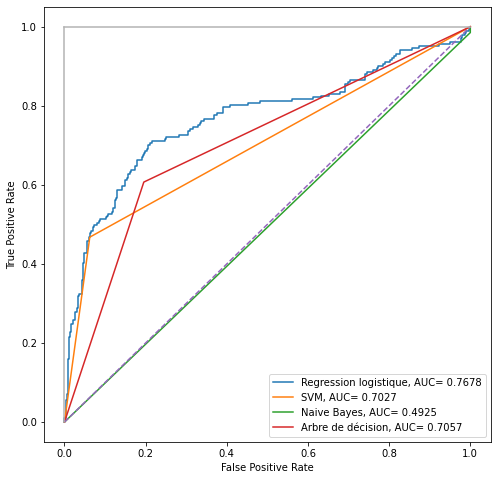

In [56]:

plt.subplots(1, figsize=(8,8))  

y_pred, y_test= clf_results(X_train, X_test, y_train, y_test,algorithm="lr")
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test, y_score=y_pred, pos_label=1)
aucMetric = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(false_positive_rate1, true_positive_rate1, label='Regression logistique, AUC= '+str(aucMetric))

print("Regression logistique")
evaluation_metrics(y_test, y_pred)


clf = svm.SVC(kernel='linear') 
svm.NuSVC()
clf.fit(X_train, y_train)
pickle.dump(clf, open('D:/PFEMaster/EmbeddingVectors/CodeBERT_svm.pkl', 'wb'))
y_pred = clf.predict(X_test)

#y_pred, y_test= clf_results(X_train, X_test, y_train, y_test,algorithm="svm")
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test, y_score=y_pred, pos_label=1)
aucMetric = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(false_positive_rate1, true_positive_rate1, label='SVM, AUC= '+str(aucMetric))

print("SVM")
evaluation_metrics(y_test, y_pred)

y_pred, y_test=clf_results(X_train, X_test, y_train, y_test,algorithm="nb")
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test, y_score=y_pred, pos_label=1)
aucMetric = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(false_positive_rate1, true_positive_rate1, label='Naive Bayes, AUC= '+str(aucMetric))

print("NB")
evaluation_metrics(y_test, y_pred)


y_pred, y_test=clf_results(X_train, X_test, y_train, y_test,algorithm="dt")
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test, y_score=y_pred, pos_label=1)
aucMetric = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(false_positive_rate1, true_positive_rate1, label='Arbre de décision, AUC= '+str(aucMetric))

print("AD")
evaluation_metrics(y_test, y_pred)


plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
#plt.show()

#evaluation_metrics(names=names,y_trues=y_tests, y_pred_probs=y_preds)

# experimentation des granularités

C:\Users\Rcom\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Files 

real positive: 0, real negative: 0
positive: 123, negative: 432
Accuracy: 0.812613 -- Precision: 0.910569 -- Recall: 0.546341 -- F1: 0.682927 -- AUC: 0.877951 

Methodes 

real positive: 0, real negative: 0
positive: 158, negative: 2
Accuracy: 0.712500 -- Precision: 0.721519 -- Recall: 0.982759 -- F1: 0.832117 -- AUC: 0.827782 



C:\Users\Rcom\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rcom\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lines 

real positive: 0, real negative: 0
positive: 111, negative: 465
Accuracy: 0.810764 -- Precision: 0.891892 -- Recall: 0.505102 -- F1: 0.644951 -- AUC: 0.848577 



C:\Users\Rcom\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fusion 

real positive: 0, real negative: 0
positive: 125, negative: 452
Accuracy: 0.786828 -- Precision: 0.880000 -- Recall: 0.504587 -- F1: 0.641399 -- AUC: 0.821893 



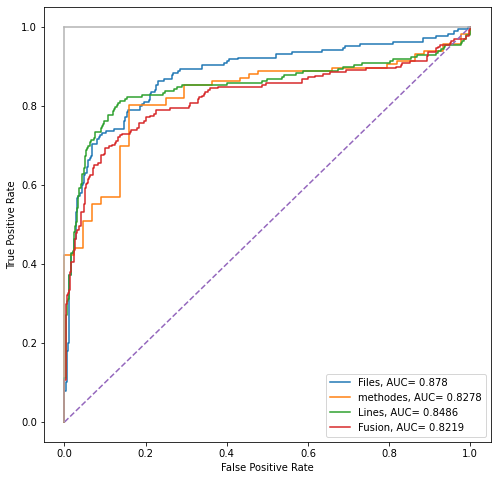

In [424]:

#experimentation des granularités
plt.subplots(1, figsize=(8,8))  


#Create a svm Classifier
y_pred, y_test=clf_results(X_train, X_test, y_train, y_test,algorithm="svm")
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test, y_score=y_pred, pos_label=1)
aucMetric = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(false_positive_rate1, true_positive_rate1, label='Files, AUC= '+str(aucMetric))

print("Files \n")
evaluation_metrics(y_test, y_pred)


y_pred, y_test=clf_results(X_train2, X_test2, y_train2, y_test2,algorithm="svm")
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test2, y_score=y_pred, pos_label=1)
aucMetric = round(metrics.roc_auc_score(y_test2, y_pred), 4)
plt.plot(false_positive_rate1, true_positive_rate1, label='methodes, AUC= '+str(aucMetric))

print("Methodes \n")
evaluation_metrics(y_test2, y_pred)

y_pred, y_test=clf_results(X_train3, X_test3, y_train3, y_test3,algorithm="svm")
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test3, y_score=y_pred, pos_label=1)
aucMetric = round(metrics.roc_auc_score(y_test3, y_pred), 4)
plt.plot(false_positive_rate1, true_positive_rate1, label='Lines, AUC= '+str(aucMetric))

print("Lines \n")
evaluation_metrics(y_test3, y_pred)


y_pred, y_test=clf_results(X_train4, X_test4, y_train4, y_test4,algorithm="svm")
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test4, y_score=y_pred, pos_label=1)
aucMetric = round(metrics.roc_auc_score(y_test4, y_pred), 4)
plt.plot(false_positive_rate1, true_positive_rate1, label='Fusion, AUC= '+str(aucMetric))

print("Fusion \n")
evaluation_metrics(y_test4, y_pred)

#y_pred, y_test=clf_results(X_train5, X_test5, y_train5, y_test5,algorithm="svm")
#false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true=y_test5, y_score=y_pred, pos_label=1)
#aucMetric = round(metrics.roc_auc_score(y_test5, y_pred), 4)
#plt.plot(false_positive_rate1, true_positive_rate1, label='CodeGPT, AUC= '+str(aucMetric))

#print("CodeGPT \n")
#evaluation_metrics(y_test, y_pred)


plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
#plt.show()

#evaluation_metrics(names=names,y_trues=y_tests, y_pred_probs=y_preds)

# Validation croisée

In [19]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"TrainingAccuracyscores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean(),
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean(),
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [21]:
modelLR = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
modelLR_result = cross_validation(modelLR, X_train, y_train, 5)
print("--------------------------------------------------------------------------------------------")
print("Results")
print("--------------------------------------------------------------------------------------------")
print("Training Accuracy scores : "+ str(modelLR_result["TrainingAccuracyscores"]))
print("--------------------------------------------------------------------------------------------")
print("Mean Training Accuracy : "+ str(modelLR_result["Mean Training Accuracy"]))
print("--------------------------------------------------------------------------------------------")
print("Training Precision scores : "+ str(modelLR_result["Training Precision scores"]))
print("--------------------------------------------------------------------------------------------")
print("Mean Training Precision : "+ str(modelLR_result["Mean Training Precision"]))
print("--------------------------------------------------------------------------------------------")
print("Training Recall scores : "+ str(modelLR_result["Training Recall scores"]))
print("--------------------------------------------------------------------------------------------")
print("Mean Training Recall : "+ str(modelLR_result["Mean Training Recall"]))
print("--------------------------------------------------------------------------------------------")
print("Training F1 scores : "+ str(modelLR_result["Training F1 scores"]))
print("--------------------------------------------------------------------------------------------")
print("Mean Training F1 Score : "+ str(modelLR_result["Mean Training F1 Score"]))
print("--------------------------------------------------------------------------------------------")
print("Validation Accuracy scores : "+ str(modelLR_result["Validation Accuracy scores"]))
print("--------------------------------------------------------------------------------------------")
print("Mean Validation Accuracy : "+ str(modelLR_result["Mean Validation Accuracy"]))
print("--------------------------------------------------------------------------------------------")
print("Validation Precision scores : "+ str(modelLR_result["Validation Precision scores"]))
print("--------------------------------------------------------------------------------------------")
print("Mean Validation Precision : "+ str(modelLR_result["Mean Validation Precision"]))
print("--------------------------------------------------------------------------------------------")
print("Validation Recall scores : "+ str(modelLR_result["Validation Recall scores"]))
print("--------------------------------------------------------------------------------------------")
print("Mean Validation Recall : "+ str(modelLR_result["Mean Validation Recall"]))
print("--------------------------------------------------------------------------------------------")
print("Validation F1 scores : "+ str(modelLR_result["Validation F1 scores"]))
print("--------------------------------------------------------------------------------------------")
print("Mean Validation F1 Score : "+ str(modelLR_result["Mean Validation F1 Score"]))
              

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

--------------------------------------------------------------------------------------------
Results
--------------------------------------------------------------------------------------------
Training Accuracy scores : [0.95072464 0.95458937 0.94589372 0.95072464 0.94787645]
--------------------------------------------------------------------------------------------
Mean Training Accuracy : 0.9499617630052413
--------------------------------------------------------------------------------------------
Training Precision scores : [0.9672619  0.96764706 0.95043732 0.95894428 0.9641791 ]
--------------------------------------------------------------------------------------------
Mean Training Precision : 0.9616939334744459
--------------------------------------------------------------------------------------------
Training Recall scores : [0.89041096 0.90136986 0.89315068 0.89835165 0.88493151]
--------------------------------------------------------------------------------------------
M